In [1]:
#Imports

#EDA
import pandas as pd
import pingouin as pg
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Otimização de Hiperparâmetros
import optuna


In [2]:
# Carregar dataset
df_segmento = pd.read_csv('datasets/1704826692877-attachment.csv')

### EDA

In [4]:
# Visualização do dataset
df_segmento.head(10)

,atividade_economica,faturamento_mensal,numero_de_funcionarios,localizacao,idade,inovacao,segmento_de_cliente
0,Comércio,713109.95,12,Rio de Janeiro,6,1,Bronze
1,Comércio,790714.38,9,São Paulo,15,0,Bronze
2,Comércio,1197239.33,17,São Paulo,4,9,Silver
3,Indústria,449185.78,15,São Paulo,6,0,Starter
4,Agronegócio,1006373.16,15,São Paulo,15,8,Silver
5,Serviços,1629562.41,16,Rio de Janeiro,11,4,Silver
6,Serviços,771179.95,13,Vitória,0,1,Starter
7,Serviços,707837.61,16,São Paulo,10,6,Silver
8,Comércio,888983.66,17,Belo Horizonte,10,1,Bronze
9,Indústria,1098512.64,13,Rio de Janeiro,9,3,Bronze


In [5]:
# Estrutura do dataset
df_segmento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   atividade_economica     500 non-null    object 
 1   faturamento_mensal      500 non-null    float64
 2   numero_de_funcionarios  500 non-null    int64  
 3   localizacao             500 non-null    object 
 4   idade                   500 non-null    int64  
 5   inovacao                500 non-null    int64  
 6   segmento_de_cliente     500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [6]:
# Valores possiveis - Variaveis categoricas
df_segmento['atividade_economica'].unique()

array(['Comércio', 'Indústria', 'Agronegócio', 'Serviços'], dtype=object)

In [7]:
# Valores possiveis - Variaveis categoricas
df_segmento['localizacao'].unique()

array(['Rio de Janeiro', 'São Paulo', 'Vitória', 'Belo Horizonte'],
      dtype=object)

In [8]:
# Valores possiveis - Variaveis categoricas
df_segmento['segmento_de_cliente'].unique()

array(['Bronze', 'Silver', 'Starter', 'Gold'], dtype=object)

In [9]:
# Valores possiveis - Variaveis categoricas
df_segmento['inovacao'].unique()

array([1, 0, 9, 8, 4, 6, 3, 7, 5, 2])

In [11]:
# Distribuição da variável alvo (segmento_de_cliente)
contagem_target = df_segmento.value_counts('segmento_de_cliente')
contagem_target

segmento_de_cliente
Silver     260
Bronze     202
Starter     22
Gold        16
Name: count, dtype: int64

In [12]:
# Criar uma lista ordenada do segmento_de_cliente
lista_segmentos = ['Starter', 'Bronze', 'Silver', 'Gold']

In [13]:
# Distribuição da variável alvo - contagem
px.bar(contagem_target, color=contagem_target.index, category_orders={'segmento_de_cliente':lista_segmentos} )

In [14]:
# Distribuição da variavel target - porcentual
percentual_target = contagem_target / len(df_segmento) * 100
px.bar(percentual_target, color=percentual_target.index, category_orders={'segmento_de_cliente':lista_segmentos} )


In [19]:
# Distribuição da variavel localizacao - porcentual
percentual_local = df_segmento.value_counts('localizacao') / len(df_segmento) * 100
px.bar(percentual_local, color=percentual_local.index, category_orders={'segmento_de_cliente':lista_segmentos} )

In [ ]:
# Distribuição da variavel Atividade Economica - porcentual
percentual_atividade = df_segmento.value_counts('atividade_economica') / len(df_segmento) * 100
px.bar(percentual_atividade, color=percentual_atividade.index, category_orders={'segmento_de_cliente':lista_segmentos} )

In [18]:
# Distribuição da variavel inovação - porcentual
percentual_inovacao = df_segmento.value_counts('inovacao') / len(df_segmento) * 100
px.bar(percentual_inovacao, color=percentual_inovacao.index, category_orders={'segmento_de_cliente':lista_segmentos} )

In [20]:
# Tabela de contigencia entre localização e target
crosstab_localizacao = pd.crosstab(df_segmento['localizacao'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()

tabela_localizacao = ff.create_table(crosstab_localizacao)

#mostrar a crosstab
tabela_localizacao.show()

In [21]:
# Tabela de contigencia entre atividade economica e target
crosstab_atividade = pd.crosstab(df_segmento['atividade_economica'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()

tabela_atividade = ff.create_table(crosstab_atividade)

#mostrar a crosstab
tabela_atividade.show()

In [22]:
# Tabela de contigencia entre inovacao e target
crosstab_inovacao = pd.crosstab(df_segmento['inovacao'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmentos].reset_index()

tabela_inovacao = ff.create_table(crosstab_inovacao)

#mostrar a crosstab
tabela_inovacao.show()

In [23]:
# Distribuição idade da Empresa
px.histogram(df_segmento, x='idade')

In [24]:
# Distribuição idade da Faturamento mensal
px.histogram(df_segmento, x='faturamento_mensal')

In [26]:
# BoxPlot entre idade de Segmento

px.box(df_segmento, x='segmento_de_cliente', y='idade', color='segmento_de_cliente', category_orders={'segmento_de_cliente':lista_segmentos})

In [27]:
# BoxPlot entre Faturamento Mensal de Segmento

px.box(df_segmento, x='segmento_de_cliente', y='faturamento_mensal', color='segmento_de_cliente', category_orders={'segmento_de_cliente':lista_segmentos})

In [ ]:
# Teste de Qui-Quadrado de Pearson
# H0 - as variaveis independentes
# H1 - as variaveis nao sao independentes
# P-value > 0.05 seguimos com o H0


valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'inovacao')



c:\Users\dccas\.virtualenvs\Classificação-Arvore-Decisao-ulDtoexp\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\dccas\.virtualenvs\Classificação-Arvore-Decisao-ulDtoexp\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.

c:\Users\dccas\.virtualenvs\Classificação-Arvore-Decisao-ulDtoexp\Lib\site-packages\scipy\stats\_stats_py.py:7344: RuntimeWarning:

divide by zero encountered in power

c:\Users\dccas\.virtualenvs\Classificação-Arvore-Decisao-ulDtoexp\Lib\site-packages\scipy\stats\_stats_py.py:7344: RuntimeWarning:

invalid value encountered in multiply

c:\Users\dccas\.virtualenvs\Classificação-Arvore-Decisao-ulDtoexp\Lib\site-packages\scipy\stats\_stats_py.py:7341: RuntimeWarning:

divide by zero encountered in divide



In [37]:
# Valor esperado
# É a frequencia que seria esperada se nao houvesse associação entre as variaveis
# É calculado utilizando a distribuição assumida no teste qui-quadrado
valor_esperado

inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,21.008,23.028,22.624,19.392,17.372,17.372,21.816,21.412,18.988,18.988
Gold,1.664,1.824,1.792,1.536,1.376,1.376,1.728,1.696,1.504,1.504
Silver,27.040,29.640,29.120,24.960,22.360,22.360,28.080,27.560,24.440,24.440
Starter,2.288,2.508,2.464,2.112,1.892,1.892,2.376,2.332,2.068,2.068


In [38]:
# Valor observado
# É a frequencia real dos dados coletados
valor_observado

inovacao,0,1,2,3,4,5,6,7,8,9
segmento_de_cliente,,,,,,,,,,
Bronze,36,44,32,22,12,14,15,12,9,6
Gold,0,0,0,0,0,3,0,5,4,4
Silver,10,5,20,25,30,25,38,36,34,37
Starter,6,8,4,1,1,1,1,0,0,0


In [39]:
# Estatisticas
estatisticas.round(5)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,164.29399,27.0,0.0,0.33095,0.99850
1,cressie-read,0.66667,165.49946,27.0,0.0,0.33216,0.99861
2,log-likelihood,0.00000,181.48878,27.0,0.0,0.34784,0.99951
3,freeman-tukey,-0.50000,NaN,27.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.00000,inf,27.0,0.0,inf,NaN
5,neyman,-2.00000,NaN,27.0,NaN,NaN,NaN


As variaveis localização e segmento de cliente sao independentes. Qui-Quadrado (p-value = 0.81714)
As variaveis atividade enconomica e segmento de cliente sao independentes. Qui-Quadrado (p-value = 0.35292)
As variaveis inovacao e segmento de cliente nao sao independentes. Qui-Quadrado (p-value = 0.0)



### Treinamento do Modelo

In [43]:
# Separar X e y
X = df_segmento.drop(columns=['segmento_de_cliente'])
y = df_segmento['segmento_de_cliente']

In [45]:
# Pipeline
# OneHotEncode nas variaveis categoricas
# Treinamento do modelo

# lista de variaveis categoricas
categorical_features = ['atividade_economica', 'localizacao']

# Criar um transformador de variaveis categoricas usando OneHotEncoder
categorical_transform = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pre processador
preprocessor = ColumnTransformer(
  transformers=[
    ('cat', categorical_transform, categorical_features)
  ]
)

#Pipeline com Pre-processor e o modelo de Arvore de Decisao
dt_model = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('classifier', DecisionTreeClassifier())
])

### Validação Cruzada

In [46]:
# Treinar o modelo com validação cruzada, usando StratifiedKfold, dado que as classes estao desbalanceadas

cv_fold= StratifiedKFold(n_splits=3,shuffle=True, random_state=51)
metrics_result = cross_validate(dt_model, X,y,cv=cv_fold,scoring=['accuracy'], return_estimator=True)

In [47]:
# Mostrar o Retorno do cross validations

metrics_result

{'fit_time': array([0.01816392, 0.00553036, 0.00515795]),
 'score_time': array([0.00424886, 0.00301123, 0.00302482]),
 'estimator': [Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(strategy='most_frequent')),
                                                                    ('onehot',
                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                    ['atividade_economica',
                                                     'localizacao'])])),
                  ('classifier', DecisionTreeClassifier())]),
  Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
        

In [48]:
# media da acuracia, considerando os 3 splits
metrics_result['test_accuracy'].mean()

np.float64(0.4739917754851743)

In [ ]:
# Acuracia
# total de previsoes corretas / total de previsoes

### Metricas

In [49]:
# fazendo predições usando Cross validation
y_pred = cross_val_predict(dt_model, X , y, cv=cv_fold)

In [54]:
classification_report_str = classification_report(y, y_pred)
print(f'Relatorio de classificacao\n{classification_report_str}')

Relatorio de classificacao
              precision    recall  f1-score   support

      Bronze       0.41      0.36      0.38       202
        Gold       0.00      0.00      0.00        16
      Silver       0.51      0.63      0.57       260
     Starter       0.00      0.00      0.00        22

    accuracy                           0.47       500
   macro avg       0.23      0.25      0.24       500
weighted avg       0.43      0.47      0.45       500



c:\Users\dccas\.virtualenvs\Classificação-Arvore-Decisao-ulDtoexp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\dccas\.virtualenvs\Classificação-Arvore-Decisao-ulDtoexp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\dccas\.virtualenvs\Classificação-Arvore-Decisao-ulDtoexp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



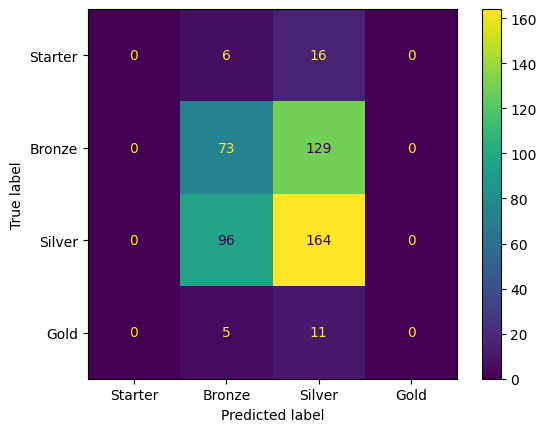

In [57]:
# Mostrar Matriz de Confusao
confusion_matrix_modelo = confusion_matrix(y, y_pred, labels=lista_segmentos)
disp = ConfusionMatrixDisplay(confusion_matrix_modelo, display_labels=lista_segmentos)
disp.plot()